In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Training.csv")

# Separate features and target
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

# Fix weird non-numeric values (like '0xf') in 'malaise'
X['malaise'] = pd.to_numeric(X['malaise'], errors='coerce').fillna(0)

# Drop constant/low-variance columns
low_variance = X.loc[:, X.nunique() <= 1].columns.tolist()
X = X.drop(columns=low_variance)

# RandomForest for feature importance
rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_
rf_feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Chi-square test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False)

# Top 20 features from each
top_rf_features = rf_feature_ranks.head(20)
top_chi2_features = chi2_scores.head(20)

# print("🔥 Top 20 Features (RandomForest):")
print(top_rf_features)

# print("\n🔍 Top 20 Features (Chi2):")
# print(top_chi2_features)

# print("\n🧹 Dropped Low Variance Features:")
# print(low_variance)


/var/folders/t5/8mxcp2397dv5bg5tp9njth1w0000gn/T/ipykernel_11490/4092780446.py:7: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Training.csv")


muscle_pain              0.018459
itching                  0.016645
mild_fever               0.016341
family_history           0.015145
yellowing_of_eyes        0.014673
chest_pain               0.014464
dark_urine               0.013979
altered_sensorium        0.013964
high_fever               0.013799
lack_of_concentration    0.013534
weight_loss              0.013086
fatigue                  0.012598
joint_pain               0.012591
nausea                   0.012141
stomach_pain             0.011642
mucoid_sputum            0.011592
neck_pain                0.011305
loss_of_appetite         0.011300
chills                   0.011193
unsteadiness             0.011052
dtype: float64


In [ ]:
features = ["muscle_pain"             ,
"itching"                 ,
"mild_fever"              ,
"family_history"          ,
"yellowing_of_eyes"       ,
"chest_pain"              ,
"dark_urine"              ,
"altered_sensorium"       ,
"high_fever"              ,
"lack_of_concentration"   ,
"weight_loss"             ,
"fatigue"                 ,
"joint_pain"              ,
"nausea"                  ,
"stomach_pain"            ,
"mucoid_sputum"           ,
"neck_pain"               ,
"loss_of_appetite"        ,
"chills"                  ,
"unsteadiness"            ,
]

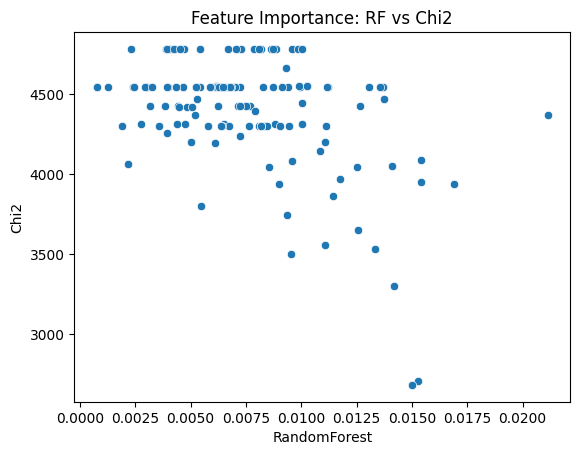

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare RF & Chi2 scores
combined_scores = pd.DataFrame({
    "RandomForest": rf_feature_ranks,
    "Chi2": chi2_scores
}).dropna()

sns.scatterplot(data=combined_scores, x="RandomForest", y="Chi2")
plt.title("Feature Importance: RF vs Chi2")
plt.show()
